<h1>Reading and labeling the dataset</h1>

The file structure and the symmetries have been created with `createDatabase.py`, a folder called `images` containing all symmetries and a **.csv** file called `labels.csv` with all the indications necessary to generate masks.

In [1]:
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from os.path import join
from Utils.functions import drawMultipleSAandBB

<h3>Reading previous dataset</h3>

Given the time to create random textures, it is necessary to implement the code such that the database can continue after stopping. For this we first read the previous images.

In [4]:
DATASET_DIRECTORY = 'symmetry_database'

df = pd.read_csv(join(DATASET_DIRECTORY,'labels.csv'),index_col='index')
df

,fileName,numSymmetries,numDecoys,symmetries,Darkness,xPeriod,yPeriod,turbSize,offsetX,offsetY,backgroundType,turbPower,inverse
index,,,,,,,,,,,,,
0,0.png,3,13,"[{'symAxes': [[[99.0807093657659, 8.9719711235...",0.650715,3,5,8,-177,-196,1,1.795249,1.0
1,1.png,3,9,"[{'center': (28.47, 142.66), 'width': 74.46, '...",0.268050,1,2,64,0,0,0,0.023487,0.0
2,2.png,2,5,"[{'center': (143.43604376421328, 25.5844352035...",0.650342,8,7,64,0,0,0,0.426182,0.0
3,3.png,2,5,"[{'center': (165.92310204413153, 93.1485527134...",0.142932,9,8,64,-67,-153,1,0.248399,1.0
4,4.png,3,7,"[{'center': (155.61038280132206, 31.1545256326...",0.041228,3,1,16,-160,-46,1,2.104438,1.0
5,5.png,2,8,"[{'center': (142.60788522392258, 36.7104082188...",0.412288,9,4,16,-68,-202,1,1.800482,1.0
6,6.png,1,16,"[{'center': (57.80330938644999, 30.96759293382...",0.016406,8,9,64,0,0,0,0.793312,0.0
7,7.png,4,8,"[{'symAxes': [[[57.37194473084372, 56.80925116...",0.476387,8,8,8,0,0,0,1.249746,0.0
8,8.png,1,10,"[{'center': (103.41390325542326, 127.693201627...",0.146726,1,6,8,0,0,0,2.748523,0.0


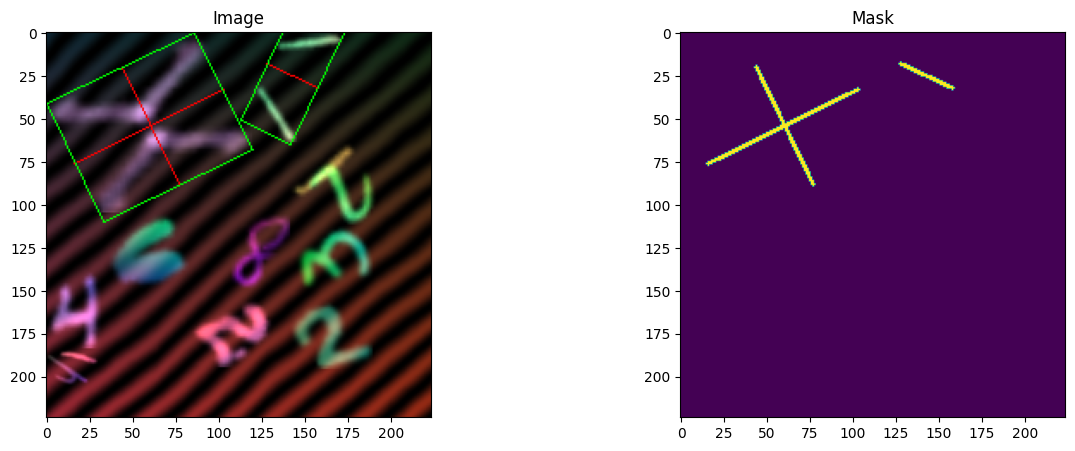

In [5]:
# Draws all symmetries in the row on the img
def drawRow(img, row):
    # Transforming list of dictionaries drom str to list
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        drawMultipleSAandBB(img, symm['symAxes'], symm['center'], symm['width'], symm['height'], symm['finalRotation'])
    return img

# Returns a mask of the selected row
def getMask(row, path, thickness = 2):
    img = cv2.imread(join(path, row['fileName']))
    mask = np.zeros((img.shape[:2]), np.uint8)
    # Painting axis on mask
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        for [startAxis,endAxis] in symm['symAxes']:
            cv2.line(mask, (int(startAxis[0]),int(startAxis[1])), (int(endAxis[0]),int(endAxis[1])), 255, thickness)
    return mask

row = df.iloc[2]
img = cv2.imread(join('symmetry_database', 'images', row['fileName']))
drawRow(img, row)
mask = getMask(row, join(DATASET_DIRECTORY, 'images'))

# Display
_, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'Image')
ax[1].imshow(mask), ax[1].set_title(f'Mask')

plt.show()
        


In [6]:
for _,row in tqdm(df.iterrows(), total=len(df)):
    mask = getMask(row, join(DATASET_DIRECTORY, 'images'))
    cv2.imwrite(join(DATASET_DIRECTORY,'labels',f'mask_{row["fileName"]}'), mask)

100%|██████████| 31/31 [00:00<00:00, 235.48it/s]
